# View test data of Howard Slough Imagery

In [1]:
import os
import numpy as np
# File manipulation
from glob import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import shutil
from earthpy.mask import mask_pixels
from PIL import Image, ImageMath

mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.titlesize'] = 20

In [2]:
with rio.open('test_mask.tif', 'r+') as src:
    saltlake_csf = src.read()
    saltlake_csf_meta = src.meta

In [3]:
saltlake_mask = mask_pixels(saltlake_csf, saltlake_csf[5], vals = [0])

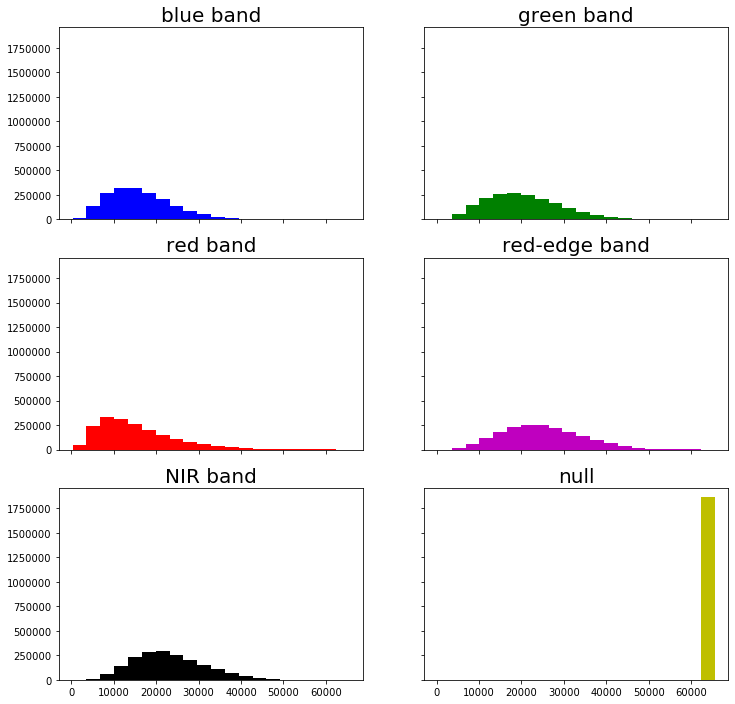

In [4]:
colors = ['b', 'g', 'r', 'm', 'k', 'y']
titles = ['blue band', 'green band', 'red band', 'red-edge band', 'NIR band', 'null']
ep.hist(saltlake_mask, 
        colors=colors, 
        title=titles, 
        cols=2)
plt.show()

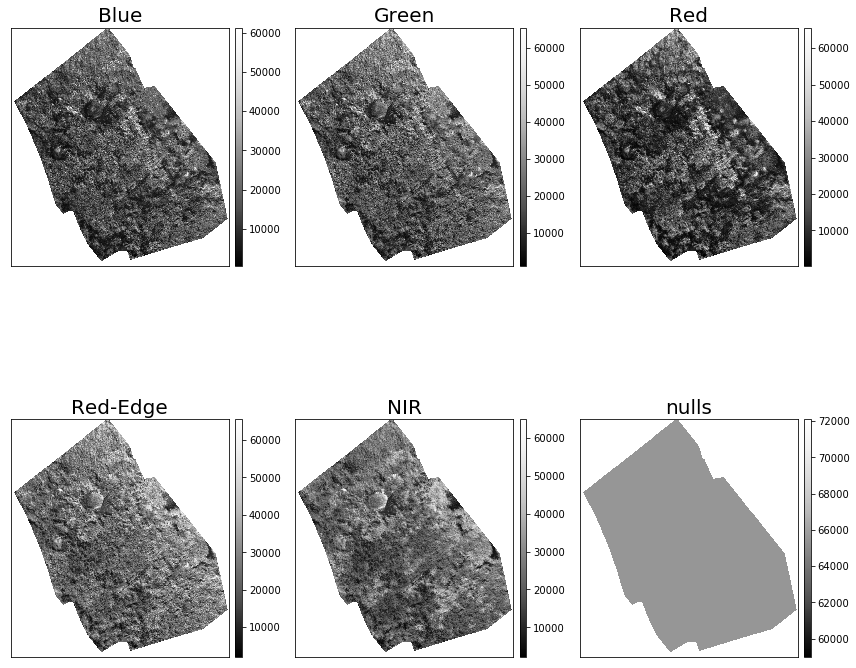

In [16]:
titles = ["Blue", "Green", "Red", "Red-Edge", "NIR", "nulls"]
ep.plot_bands(saltlake_mask,
              scale=False,
             title=titles)
plt.show()

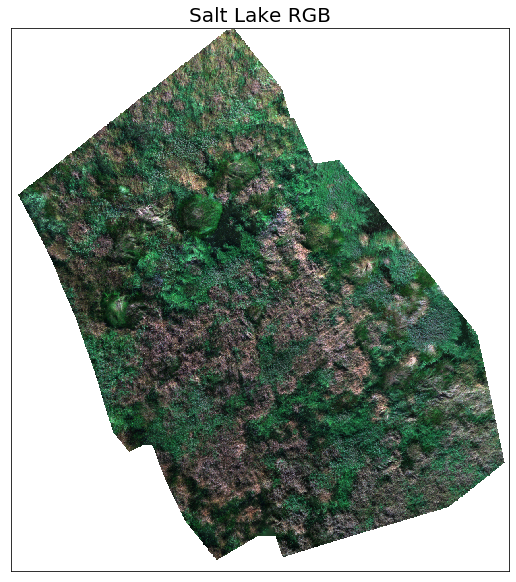

In [5]:
ep.plot_rgb(
    saltlake_mask, rgb=[2, 1, 0], title="Salt Lake RGB"
)
plt.show()

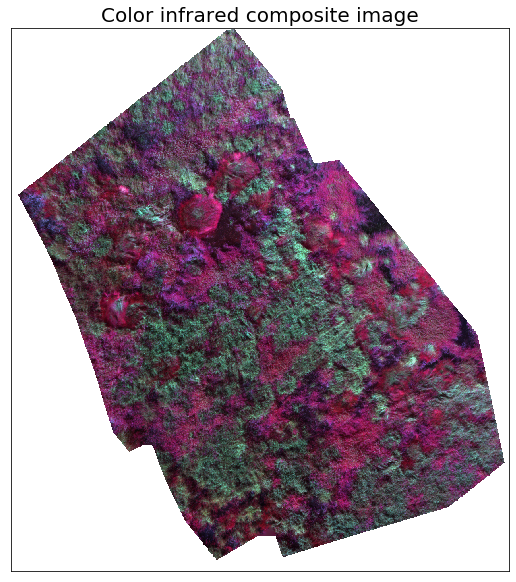

In [17]:
ep.plot_rgb(saltlake_mask,
           rgb=[4, 2, 1],
           title="Color infrared composite image")
plt.show()

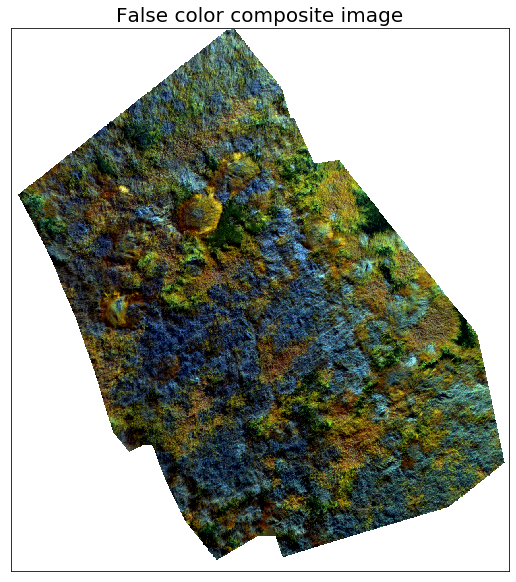

In [18]:
ep.plot_rgb(saltlake_mask,
           rgb=[4, 3, 2],
           title="False color composite image",
           stretch = True)
plt.show()

In [7]:
saltlake_ndvi = es.normalized_diff(saltlake_mask[4], saltlake_mask[2])

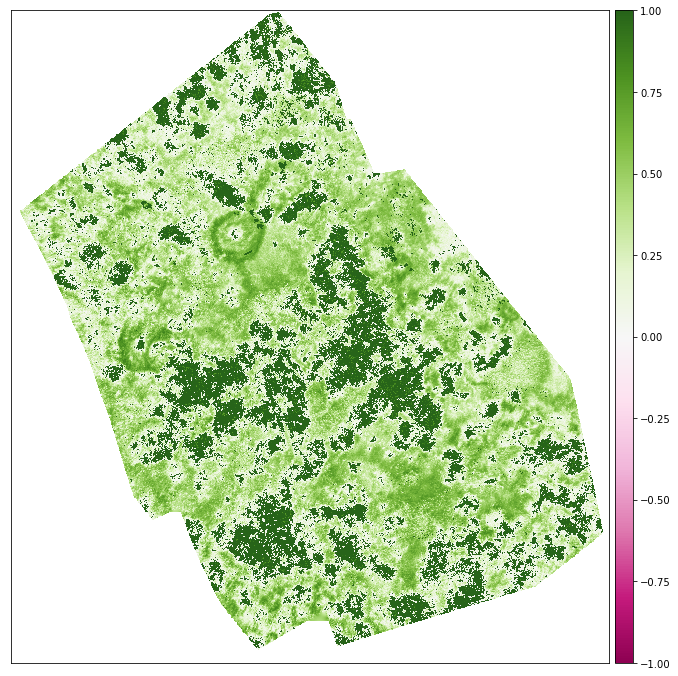

In [8]:
ep.plot_bands(saltlake_ndvi, cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1)
plt.show()

The pixels showing as dark green should really be negative (they contain non-photosynthetic vegetation and water / wet soil). Not sure why there is an issue displaying these in EarthPy.

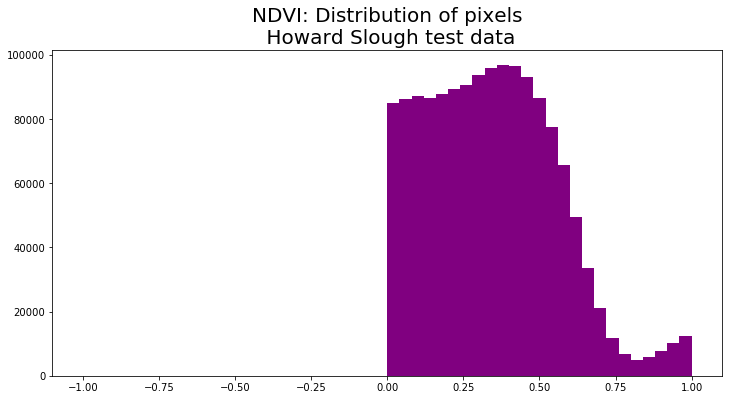

In [9]:
ep.hist(saltlake_ndvi,
        bins = 50,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n Howard Slough test data"],
        hist_range = [-1,1])
plt.show()